In [34]:
from sklearn.cluster import AgglomerativeClustering 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
crime = pd.read_csv('crime_data.csv')
crime.rename(columns={'Unnamed: 0':'state'},inplace=True)
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
# dataset contains 50 rows and 
# 5 columns 
crime.shape

(50, 5)

In [37]:
# feature data not highly skewed
crime.iloc[:,1:].skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [38]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [39]:
# no null values present 
crime.isnull().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [40]:
# features
data = crime.iloc[:,1:]
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [41]:
# classes 
target = crime[['state']]
target.head()

,state
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [42]:
# data preprocessing by standardization 
scaler = StandardScaler()
transData = scaler.fit_transform(data)
transData = pd.DataFrame(transData,columns=crime.iloc[:,1:].columns)
transData.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Hierarchical Clustering

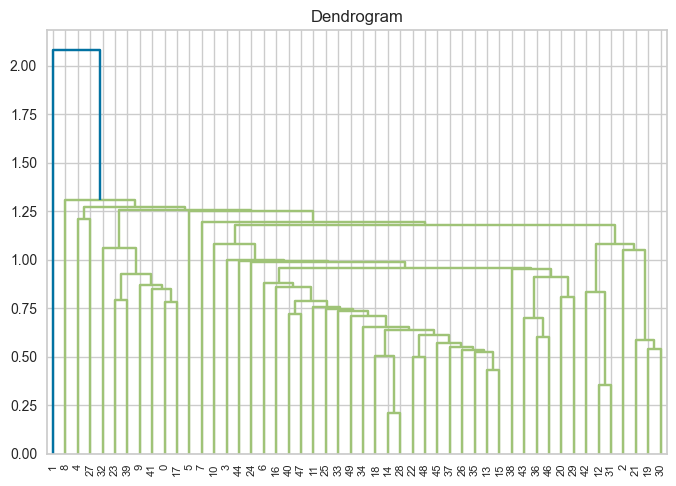

In [43]:
# tree arrangement of clusters  

dendrogram = sch.dendrogram(sch.linkage(transData,
                                        method='single'))
plt.title('Dendrogram')
plt.show()

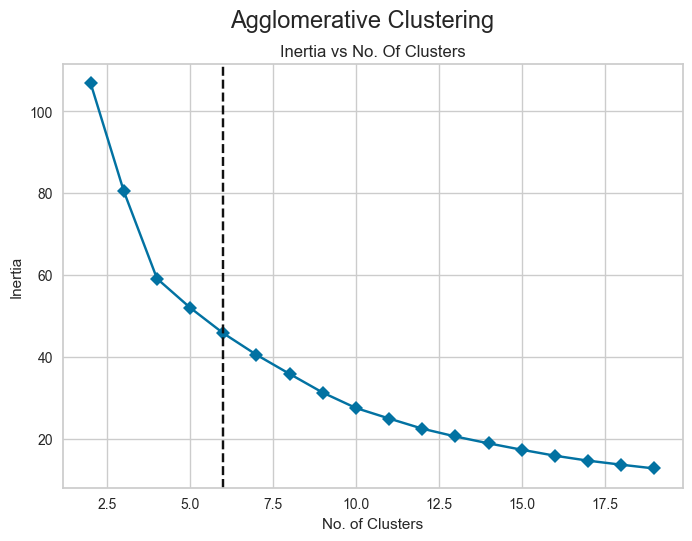

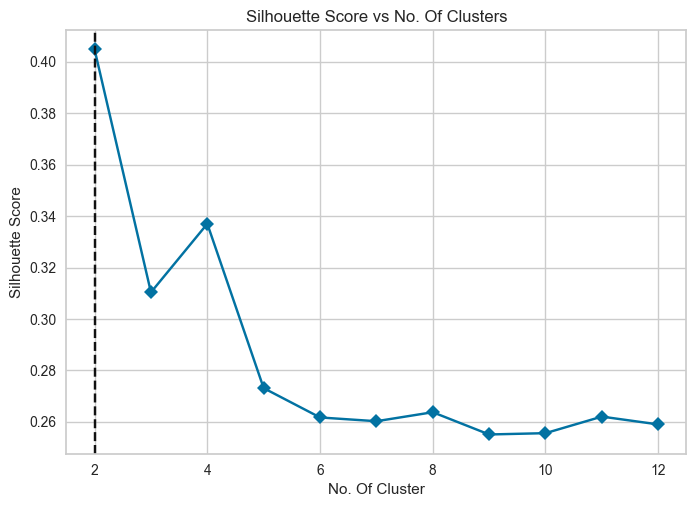

In [44]:

model = AgglomerativeClustering()
visInertia = KElbowVisualizer(model,k=(2,20),timings=False)
visInertia.fit(transData)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('Inertia vs No. Of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,13),
                       metric='silhouette',
                       timings=False)
plt.title('Silhouette Score vs No. Of Clusters')
plt.xlabel('No. Of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(transData)
plt.show()

In [45]:
# final Agglomerative (hierarchical clustering) with 
# No. of clusters = 8

final_hc = AgglomerativeClustering(n_clusters=visInertia.elbow_value_,
                                   affinity='euclidean',
                                   linkage='single')
final_hc.fit(transData)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [46]:
paMatrix = pd.crosstab(final_hc.labels_,
                       target.values.ravel())

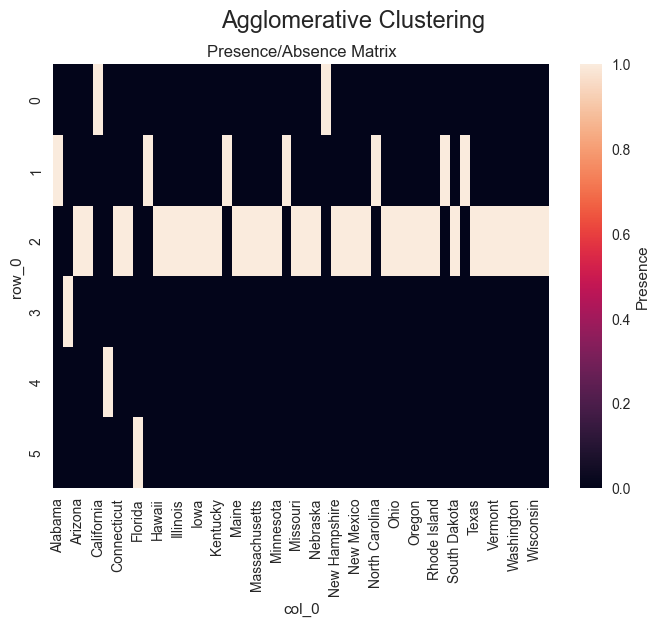

In [47]:

# presence/abscense matrix
sns.heatmap(paMatrix,
            cbar_kws={'label':'Presence'})
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('Presence/Absence Matrix')
plt.show()

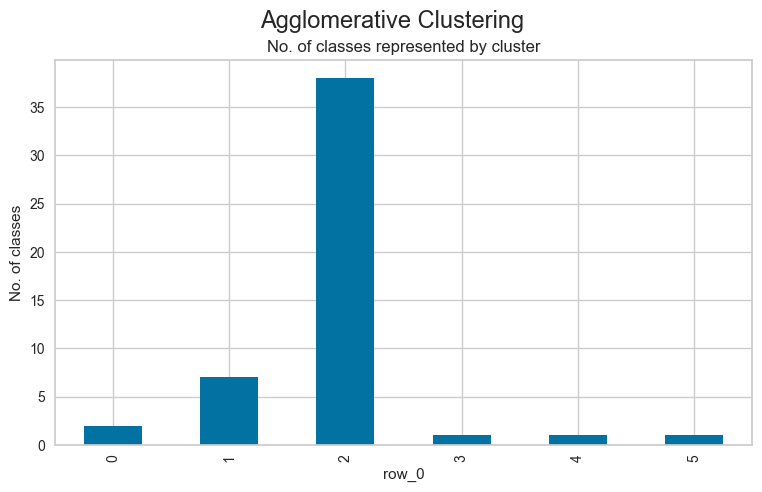

In [48]:

# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix.sum(axis=1).plot(kind='bar')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of classes represented by cluster')
plt.ylabel('No. of classes')
plt.show()

In [49]:
data['clusterID'] = final_hc.labels_
data.join(target)
data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


In [50]:
score = silhouette_score(transData,
                         final_hc.labels_)*100
score

15.038419906489478

### Agglomerative Clustering with 5 Clusters and silhouette Score of +15.03 %

## KMeans Clustering

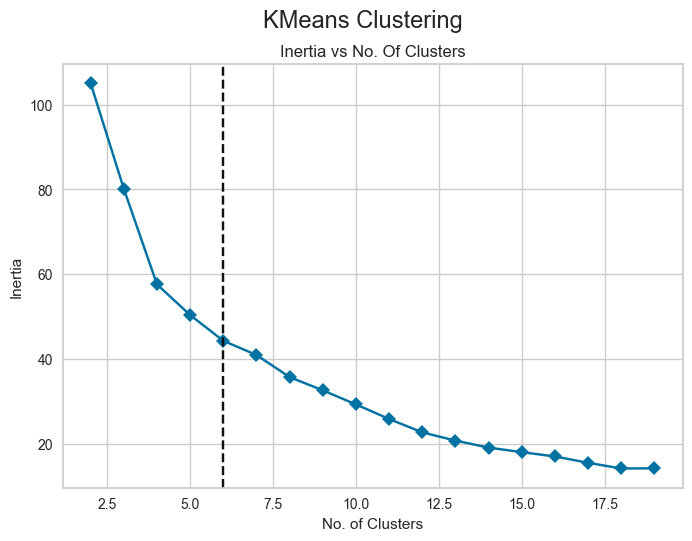

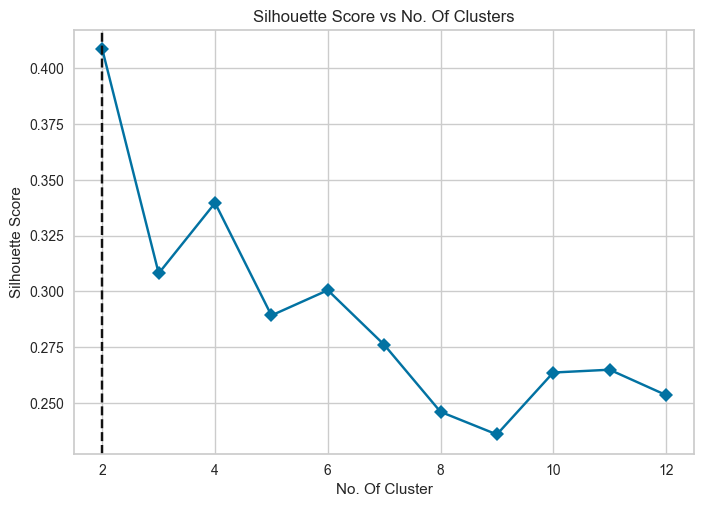

In [51]:

model = KMeans(random_state=42)
visInertia = KElbowVisualizer(model,k=(2,20),timings=False)
visInertia.fit(transData)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('Inertia vs No. Of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,13),
                       metric='silhouette',
                       timings=False)
plt.title('Silhouette Score vs No. Of Clusters')
plt.xlabel('No. Of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(transData)
plt.show()

In [52]:
# final KMeans (non-hierarchical clustering) with 
# No. of clusters = 8

final_kmeans = KMeans(n_clusters=visInertia.elbow_value_,
                      random_state=42)
final_kmeans.fit(transData)

KMeans(n_clusters=6, random_state=42)

In [53]:
paMatrix_KMeans = pd.crosstab(final_kmeans.labels_,
                       target.values.ravel())

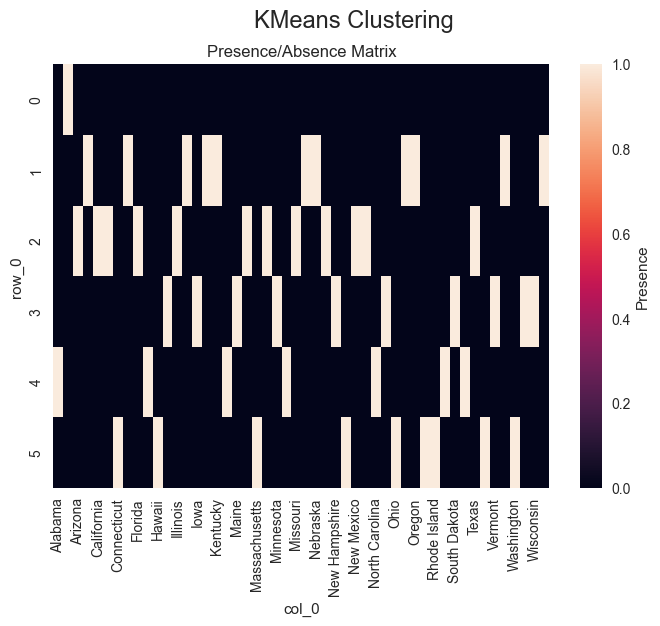

In [54]:

# presence/abscense matrix
sns.heatmap(paMatrix_KMeans,
            cbar_kws={'label':'Presence'})
plt.title('Presence/Absence Matrix')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.show()

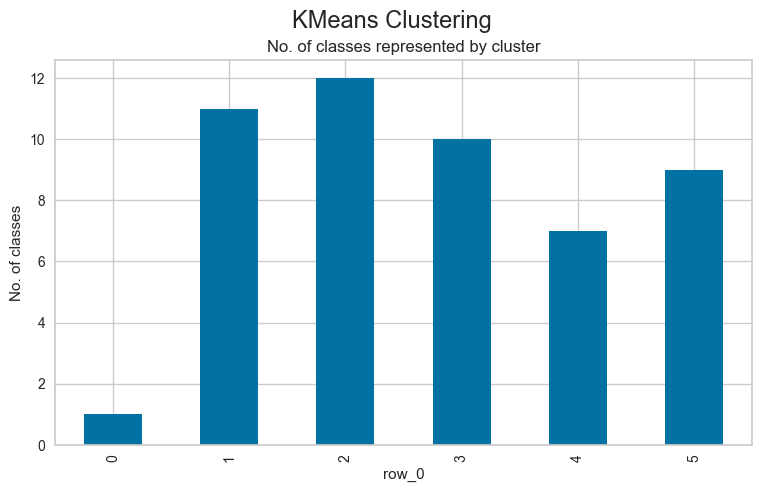

In [55]:

# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix_KMeans.sum(axis=1).plot(kind='bar')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('No. of classes represented by cluster')
plt.ylabel('No. of classes')
plt.show()

In [56]:
data['clusterID'] = final_kmeans.labels_
data.join(target)
data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [57]:
score = silhouette_score(transData,
                         final_kmeans.labels_)*100
score

30.05771754063692

### KMeans Clustering with 5 Clusters ans silhouette Score of +30.06 %

## DBSCAN Clustering 

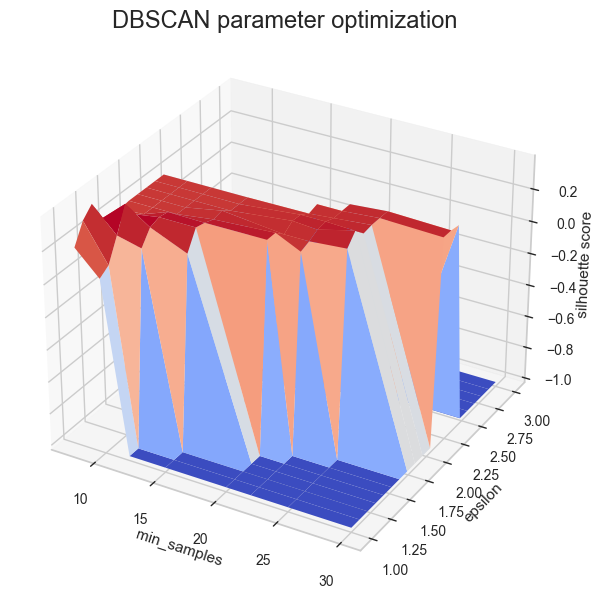

In [58]:
# brute-force-approach to find best combination
# (min_samples,epsilon) for DBSCAN clustering

eps = np.linspace(1,3,20)
min_samples = [8,10,12,15,20,22,25,30]
coor = []
for e in eps:
    score = []
    for m in min_samples:
        model = DBSCAN(eps=e,
                       min_samples=m)
        model.fit(transData)
        try:
            s = silhouette_score(transData,model.labels_)
            score.append(s)
        except :
            score.append(-1)
    coor.append(score)
coor = np.array(coor)  

new = pd.DataFrame(coor,columns=min_samples)
new['eps'] = eps

X , Y = np.meshgrid(new.columns[:-1],new.eps.values.ravel())
X = X.astype('float')
Z = new.values[:,:-1]
fig = plt.figure(label='DBSCAN parameter optimization')
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
ax.set_xlabel('min_samples')
ax.set_ylabel('epsilon')
ax.set_zlabel('silhouette score')
ax.set_title('DBSCAN parameter optimization',fontsize=17)
plt.show()

In [59]:
param = []
for ep,ms in np.argwhere(Z == Z.max()):
    param.append([new.columns[ms],new.eps[ep]])
# DBSCAN parameter giving maximum silhouette score
pd.DataFrame(param,columns=['min_samples','epsilon'])

,min_samples,epsilon
0,8,1.210526
1,10,1.315789


In [60]:
# final DBSCAN (non-hierarchical clustering) with 
# epsilon = 1.315789 and min_samples = 10

final_dbscan = DBSCAN(eps=1.315789,min_samples=10)
final_dbscan.fit(transData)

DBSCAN(eps=1.315789, min_samples=10)

In [61]:
paMatrix_DBSCAN = pd.crosstab(final_dbscan.labels_.astype('int'),
                       target.values.ravel())

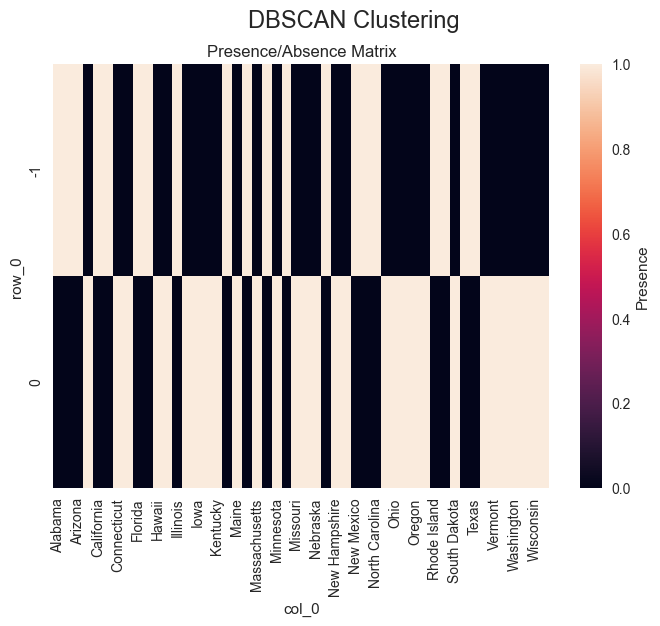

In [62]:

fig = plt.figure()
sns.heatmap(paMatrix_DBSCAN,
          cbar_kws={'label':'Presence'})
plt.title('Presence/Absence Matrix')
plt.suptitle('DBSCAN Clustering',fontsize=17)
plt.show()

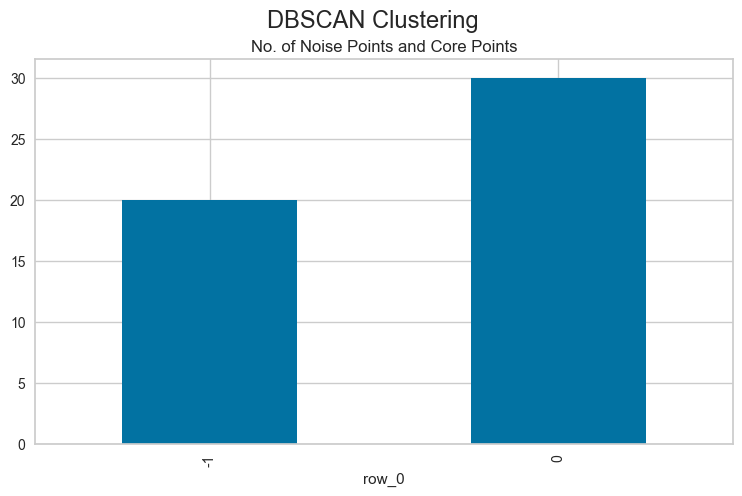

In [63]:

plt.figure(figsize=(9,5))
paMatrix_DBSCAN.sum(axis=1).plot(kind='bar')
plt.suptitle('DBSCAN Clustering',fontsize=17)
plt.title('No. of Noise Points and Core Points')
plt.show()

In [64]:
data['clusterID'] = final_dbscan.labels_
data.join(target)
data.head()

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1


In [65]:
score = silhouette_score(transData,
                         final_dbscan.labels_)*100
score

37.85664955470221

### DBSCAN Clustering with Silhouette Score of +37.86%